In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df_raw = pd.read_csv('C:\\Users\\silri\\Applied_AI\\ML_Classification_Package\\3._Logisitic_Regression\\Facebook_Ads_2.csv',encoding='latin1')

In [57]:
df = df_raw

In [58]:
print(df.head())

             Names                                             emails  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Time Spent on Site       Salary  Clicked  
0      Bulgaria           25.649648  55330.06006        0  
1        Belize           32.456107  79049.07674        1  
2       Algeria           20.945978  41098.60826        0  
3  Cook Islands           54.039325  37143.35536        1  
4        Brazil           34.249729  37355.11276        0  


In [59]:
print(len(df))

499


**The available columns**

In [60]:
df.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

**How to get the idex of a given column**

In [61]:
df.columns.get_loc('Names')

0

- We will create two datasets X and y. X will contain all the features and y will contain only the target variable which is the class label here.

- From the dataset above the name and email will not contribute much to the model.Therefore we can drop those two columns from the dataset and take rest of the columns into account.

In [68]:
X = df.drop(columns=['Names', 'emails','Clicked','Country'])
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [69]:
y = df['Clicked']
y

0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    0
498    1
Name: Clicked, Length: 499, dtype: int64

In [65]:
## Split the dataset into two halves --> Train and Test data-set

In [72]:
X.columns

Index(['Time Spent on Site', 'Salary'], dtype='object')

In [74]:
X.sample(10)

,Time Spent on Site,Salary
51,26.244382,61347.16658
142,27.949998,56403.16861
182,29.823414,41808.07561
294,45.494705,67660.87998
87,41.359597,73157.84645
299,36.501082,48317.12764
221,34.188300,15638.64601
9,29.687362,41098.87881
377,18.766071,39413.96102
24,32.443111,51677.69904


In [15]:
# df_test = pd.concat([pd.get_dummies(X['Country']),X['Country']], axis = 1)

In [76]:
## Perform OHE on top of the country column
## Perform MinMax on top of Time Spent
## Perform Standard scalling on top of Salary
## Perform Logistic regression on top of X train dataset

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import FunctionTransformer

##Use shift+M to merge the cells.

In [78]:
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [92]:
X_train.sample(5)

,Time Spent on Site,Salary
119,33.300185,66605.38717
44,19.089303,39279.88929
488,24.331054,59873.51700
455,37.085105,91568.97221
244,22.959612,35048.06141


#### Use of Column Transformers

In [83]:
# oh = OneHotEncoder(drop='first',sparse=False)
# oh.fit_transform(X_train).shape

In [93]:
trf1 = ColumnTransformer([(    
    'MinMax_timeSpent',
    MinMaxScaler(),
    #[X.columns.get_loc('Time Spent on Site')]
    [0]

    )
]
    
    , 
                         remainder = 'passthrough')

In [94]:
trf2 = ColumnTransformer([(    
                            'StandardScaling_Salary',
                            StandardScaler(),
                            #[df.columns.get_loc('Salary')]
                            [1])
                        ], remainder = 'passthrough')

#### Use of Function transformers

In [107]:
def ndarray_to_dataFrame(ndarray):
    df = pd.DataFrame(ndarray, columns=['timespent', 'salary'])
    return df

In [108]:
trf3 = FunctionTransformer(ndarray_to_dataFrame, validate=False)

In [97]:
# def oneHotEncoding(df):
#     column ='country'
#     df_column = pd.get_dummies(df[column])
#     df.drop(column, axis = 1, inplace=True)
#     df_final = pd.concat([df,df_column], axis = 1)
#     return df_final 

In [98]:
# trf4 = FunctionTransformer(oneHotEncoding, validate=False)

#### Use of Sklearn pipelines

In [109]:
pipe = Pipeline(memory=None,
               steps =[
                   
                   ('MinMax Scaling on Time Spent',trf1),
                   ('Standard Scaling on Salary',trf2),
                   ('Convert Back to Df', trf3)
#                    ('One Hot Encoding of the countries', trf4)
               ]
               ,               
               verbose=False)

In [111]:
X_final = pipe.fit_transform(X)

In [112]:
X_final

,timespent,salary
0,0.128258,0.375448
1,1.378592,0.499202
2,-0.621945,0.289927
3,-0.830444,0.891624
4,-0.819281,0.531813
...,...,...
494,-0.417912,0.258595
495,-0.590970,0.321194
496,-1.523825,0.551277
497,-1.116935,0.391621


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train , y_test = train_test_split(X_final,y, test_size=0.3, random_state=42)

In [116]:
X_train

,timespent,salary
461,1.095958,0.595446
356,0.470422,0.629192
3,-0.830444,0.891624
399,-1.004385,0.626573
380,0.862705,0.684452
...,...,...
106,-2.787379,0.380187
270,-0.925439,0.473216
348,-0.115680,0.518598
435,-1.511106,0.148983


In [117]:
y_train

461    1
356    1
3      1
399    0
380    1
      ..
106    0
270    0
348    0
435    0
102    1
Name: Clicked, Length: 349, dtype: int64

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
clf = LogisticRegression(random_state=0)

In [121]:
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [123]:
y_test

460    0
73     0
231    1
175    0
237    0
      ..
193    0
5      1
116    1
45     0
16     1
Name: Clicked, Length: 150, dtype: int64

In [125]:
y_pred = clf.predict(X_test)

In [165]:
X_test

,timespent,salary
460,-0.674238,0.408282
73,0.277679,0.358337
231,1.160458,0.382530
175,-0.415626,0.277994
237,-0.200007,0.571901
...,...,...
193,-0.833301,0.444716
5,1.462596,0.854726
116,0.756633,0.763689
45,-0.019926,0.252392


In [127]:
y_pred.shape

(150,)

In [128]:
y_test.shape

(150,)

In [129]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

<AxesSubplot:>

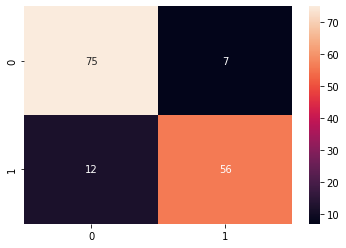

In [134]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [131]:
accuracy_score(y_test, y_pred)

0.8733333333333333

In [132]:
roc_auc_score(y_test, y_pred)

0.8690817790530847

In [133]:
recall_score(y_test, y_pred)

0.8235294117647058

In [146]:
np.array(X_train)[:,0].min() -1

-3.787379255660188

In [154]:
np.array(X_train)

array([[ 1.09595804e+00,  5.95446353e-01],
       [ 4.70422049e-01,  6.29192490e-01],
       [-8.30443624e-01,  8.91624088e-01],
       [-1.00438525e+00,  6.26573201e-01],
       [ 8.62704790e-01,  6.84451628e-01],
       [ 2.48300707e+00,  4.51694617e-01],
       [ 1.96145795e+00,  6.67102979e-01],
       [ 1.68256408e-01,  7.52784851e-01],
       [ 1.06200284e+00,  8.73625926e-01],
       [-1.25031357e+00,  6.19200648e-01],
       [ 7.78269562e-01,  7.36267355e-01],
       [-1.08608789e+00,  5.20852084e-01],
       [ 9.28106741e-01,  6.33100715e-01],
       [-1.21483411e+00,  3.75943993e-01],
       [-2.13904662e+00,  5.51027659e-01],
       [ 6.74427033e-01,  6.63663829e-01],
       [ 1.33153806e+00,  5.37121364e-01],
       [ 8.62135315e-01,  5.51990004e-01],
       [-3.98894338e-02,  7.18185572e-01],
       [ 5.59712614e-01,  6.45239599e-01],
       [-2.89783841e-02,  5.20393583e-01],
       [ 1.77425975e+00,  7.55009548e-01],
       [ 1.59028643e+00,  5.55935969e-01],
       [ 3.

In [155]:
X_train

,timespent,salary
461,1.095958,0.595446
356,0.470422,0.629192
3,-0.830444,0.891624
399,-1.004385,0.626573
380,0.862705,0.684452
...,...,...
106,-2.787379,0.380187
270,-0.925439,0.473216
348,-0.115680,0.518598
435,-1.511106,0.148983


<AxesSubplot:xlabel='timespent', ylabel='salary'>

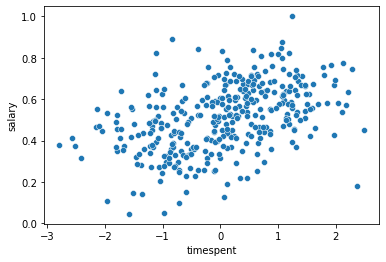

In [158]:
pd.concat([X_train, y_train],axis =1)

,timespent,salary,Clicked
461,1.095958,0.595446,1
356,0.470422,0.629192,1
3,-0.830444,0.891624,1
399,-1.004385,0.626573,0
380,0.862705,0.684452,1
...,...,...,...
106,-2.787379,0.380187,0
270,-0.925439,0.473216,0
348,-0.115680,0.518598,0
435,-1.511106,0.148983,0


<AxesSubplot:xlabel='timespent', ylabel='salary'>

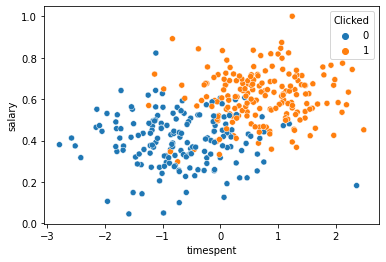

In [159]:
sns.scatterplot(data = pd.concat([X_train, y_train],axis =1) ,  x = 'timespent', y = 'salary', hue='Clicked')

In [161]:
y_pred = pd.DataFrame(y_pred, columns=['Clicked'])

In [177]:
X_test = X_test.reset_index(drop = True)

In [178]:
X_test

,timespent,salary
0,-0.674238,0.408282
1,0.277679,0.358337
2,1.160458,0.382530
3,-0.415626,0.277994
4,-0.200007,0.571901
...,...,...
145,-0.833301,0.444716
146,1.462596,0.854726
147,0.756633,0.763689
148,-0.019926,0.252392


In [168]:
y_pred = clf.predict(X_test.reset_index(drop = True))

In [175]:
y_pred_df = pd.DataFrame(y_pred, columns=['Clicked'])

In [176]:
y_pred_df

,Clicked
0,0
1,0
2,1
3,0
4,0
...,...
145,0
146,1
147,1
148,0


In [181]:
prediction  = pd.concat([X_test,y_pred_df], axis = 1)

In [182]:
prediction.columns

Index(['timespent', 'salary', 'Clicked'], dtype='object')

<AxesSubplot:xlabel='timespent', ylabel='salary'>

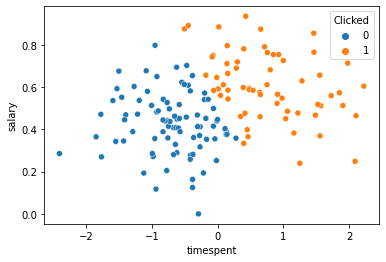

In [183]:
sns.scatterplot(data = prediction , x = 'timespent', y = 'salary', hue = 'Clicked')

***How to plot a decision surface :***

https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

In [194]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

In [195]:
x_min1, x_max1 = X_train_array[:, 0].min()-1 , X_train_array[:, 0].max()+1
x_min2, x_max2 = X_train_array[:, 1].min()-1 , X_train_array[:, 1].max()+1

In [203]:
#Define the X1 and the X2 scale
X1_scale = np.arange(x_min1, x_max1, 0.1)
X2_scale = np.arange(x_min2, x_max2, 0.1)

In [204]:
X2_scale

array([-0.95415492, -0.85415492, -0.75415492, -0.65415492, -0.55415492,
       -0.45415492, -0.35415492, -0.25415492, -0.15415492, -0.05415492,
        0.04584508,  0.14584508,  0.24584508,  0.34584508,  0.44584508,
        0.54584508,  0.64584508,  0.74584508,  0.84584508,  0.94584508,
        1.04584508,  1.14584508,  1.24584508,  1.34584508,  1.44584508,
        1.54584508,  1.64584508,  1.74584508,  1.84584508,  1.94584508])

In [205]:
# Create the meshgrid

XX1 , XX2 = np.meshgrid(X1_scale,X2_scale)

In [211]:
XX1

array([[-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074],
       [-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074],
       [-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074],
       ...,
       [-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074],
       [-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074],
       [-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
         3.31262074,  3.41262074]])

In [212]:
XX2.T

array([[-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508],
       [-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508],
       [-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508],
       ...,
       [-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508],
       [-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508],
       [-0.95415492, -0.85415492, -0.75415492, ...,  1.74584508,
         1.84584508,  1.94584508]])

In [216]:
## Flattening the vector

In [217]:
XX1.flatten()

array([-3.78737926, -3.68737926, -3.58737926, ...,  3.21262074,
        3.31262074,  3.41262074])

In [218]:
XX2.flatten()

array([-0.95415492, -0.95415492, -0.95415492, ...,  1.94584508,
        1.94584508,  1.94584508])

In [222]:
X1_vector = XX1.ravel()
X2_vector = XX2.ravel()

In [226]:
X1_vector = X1_vector.reshape(len(X1_vector), 1)
X2_vector = X2_vector.reshape(len(X2_vector), 1)

In [227]:
## Hstacking to create the X_train

In [229]:
X_grid = np.hstack((X1_vector,X2_vector))

In [230]:
X_grid

array([[-3.78737926, -0.95415492],
       [-3.68737926, -0.95415492],
       [-3.58737926, -0.95415492],
       ...,
       [ 3.21262074,  1.94584508],
       [ 3.31262074,  1.94584508],
       [ 3.41262074,  1.94584508]])

In [232]:
y_pred_grid = clf.predict(X_grid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [233]:
y_pred_grid.shape

(2190,)

In [239]:
YY = y_pred_grid.reshape(XX1.shape)

<AxesSubplot:xlabel='timespent', ylabel='salary'>

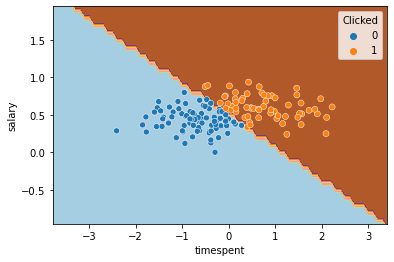

In [242]:
plt.contourf(XX1, XX2,YY,cmap = 'Paired')
sns.scatterplot(data = prediction , x = 'timespent', y = 'salary', hue = 'Clicked')